In [165]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


# Read in the data

df = pd.read_csv('movies.csv')

In [166]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Inspecting Data

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [168]:
df[['score', 'votes', 'budget', 'gross', 'runtime']].describe().round(2)

,score,votes,budget,gross,runtime
count,7665.00,7665.00,5.497000e+03,7.479000e+03,7664.00
mean,6.39,88108.50,3.558988e+07,7.850054e+07,107.26
std,0.97,163323.76,4.145730e+07,1.657251e+08,18.58
min,1.90,7.00,3.000000e+03,3.090000e+02,55.00
25%,5.80,9100.00,1.000000e+07,4.532056e+06,95.00
50%,6.50,33000.00,2.050000e+07,2.020576e+07,104.00
75%,7.10,93000.00,4.500000e+07,7.601669e+07,116.00
max,9.30,2400000.00,3.560000e+08,2.847246e+09,366.00


In [169]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

# Data Cleaning/Processing

In [170]:
# removing null data in the following columns
df.dropna(subset=['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'gross', 'company', 'runtime'],
          inplace=True)

In [171]:
# Filling missing data in budget column with the mean of the column
df['budget'] = df['budget'].fillna(df['budget'].mean())

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   released  7412 non-null   object 
 5   score     7412 non-null   float64
 6   votes     7412 non-null   float64
 7   director  7412 non-null   object 
 8   writer    7412 non-null   object 
 9   star      7412 non-null   object 
 10  country   7412 non-null   object 
 11  budget    7412 non-null   float64
 12  gross     7412 non-null   float64
 13  company   7412 non-null   object 
 14  runtime   7412 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 926.5+ KB


### replace released colum with two seperated columns of released date/location

In [173]:
df[['releasedDate','releasedCountry']] = df.released.str.split("(",expand=True)

In [174]:
df['releasedCountry'] = df['releasedCountry'].apply(lambda x: x.replace(')', ''))

In [176]:
# Remove unnecessary column
df.drop(['released'], axis=1, inplace=True)

In [177]:
df.tail()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,1.350000e+08,111105497.0,20th Century Studios,100.0,"February 21, 2020",United States
7652,The Eight Hundred,Not Rated,Action,2020,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,8.000000e+07,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0,"August 28, 2020",United States
7653,The Quarry,R,Crime,2020,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,3.600917e+07,3661.0,Prowess Pictures,98.0,"April 17, 2020",Mexico
7656,Tulsa,PG-13,Comedy,2020,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,3.600917e+07,413378.0,Pryor Entertainment,120.0,"June 3, 2020",United States
7659,I Am Fear,Not Rated,Horror,2020,3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,3.600917e+07,13266.0,Roxwell Films,87.0,"March 3, 2020",United States


### Handling Dtypes of columns

In [178]:
df.dtypes

name                object
rating              object
genre               object
year                 int64
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
releasedDate        object
releasedCountry     object
dtype: object

In [179]:
# Convert date to datetime type
df['releasedDate'] = pd.to_datetime(df['releasedDate'])

In [180]:
# convert follwing colums to int64/int type
convert_dict = {'votes': 'int64',
                'budget': 'int64',
                'gross': 'int64',
                'runtime': int
               }
  
df = df.astype(convert_dict)

In [181]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25,United States


In [184]:
# Create correct year column

df['yearCorrect'] = df['releasedDate'].astype(str).str[:4]
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,yearCorrect
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020-02-21,United States,2020
7652,The Eight Hundred,Not Rated,Action,2020,6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149,2020-08-28,United States,2020
7653,The Quarry,R,Crime,2020,5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,36009170,3661,Prowess Pictures,98,2020-04-17,Mexico,2020
7656,Tulsa,PG-13,Comedy,2020,5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,36009170,413378,Pryor Entertainment,120,2020-06-03,United States,2020


In [194]:
pd.set_option('display.max_rows', None)

In [205]:
df = df.sort_values(by=['gross'], inplace=False ,ascending=False)

In [199]:
# check for duplicates

df.duplicated().sum() # no duplicates

0

# Finding Correlations in Data, EDA

In [201]:
## Hypothesis
# Budget high Correlation
# Company high Correlation


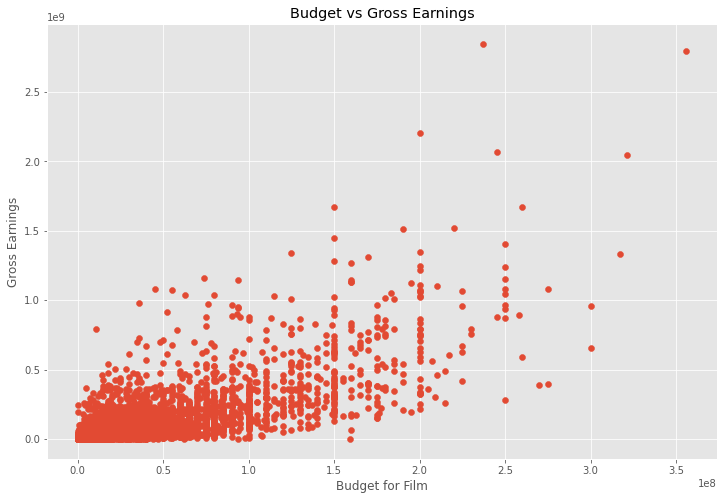

In [207]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')

plt.show()


In [206]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,yearCorrect
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009-12-18,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019-04-26,United States,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997-12-19,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015-12-18,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018-04-27,United States,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

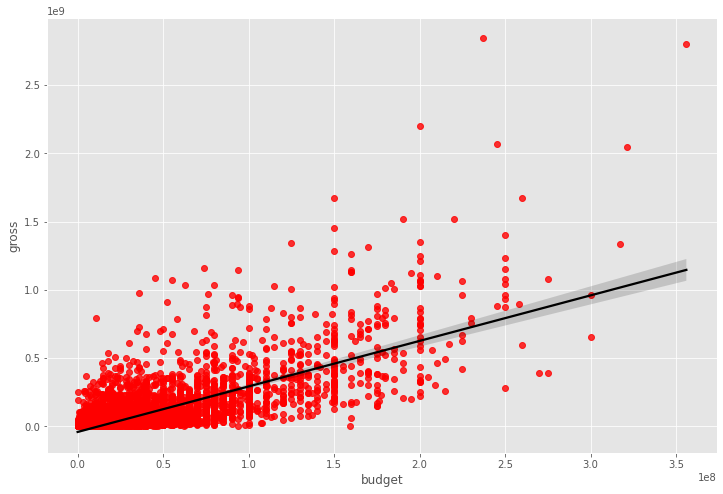

In [209]:
# P or N relation ?

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'}) # P

In [210]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.218941,0.267867,0.258826,0.114237
score,0.093951,1.000000,0.415190,0.061546,0.188071,0.397226
votes,0.218941,0.415190,1.000000,0.419349,0.631110,0.309945
budget,0.267867,0.061546,0.419349,1.000000,0.713359,0.266631
gross,0.258826,0.188071,0.631110,0.713359,1.000000,0.245117
runtime,0.114237,0.397226,0.309945,0.266631,0.245117,1.000000


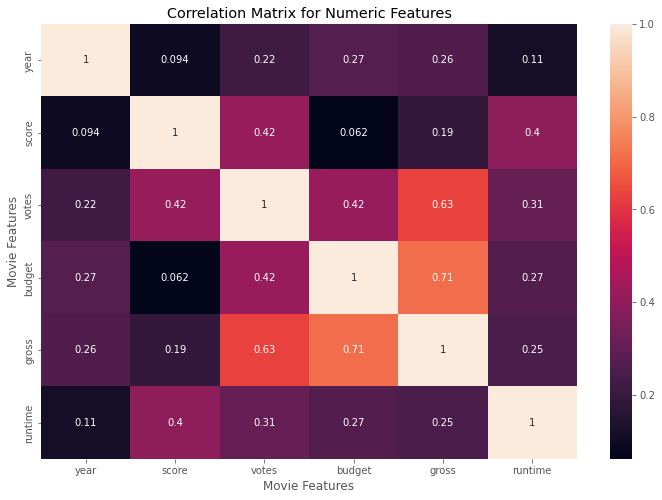

In [215]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

In [216]:
# look at Non numeric values 


In [217]:
df_numerized = df.copy()

for col in df_numerized:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,yearCorrect
5445,515,5,0,2009,7.8,1100000,1107,1705,2198,53,237000000,2847246203,2115,162,2009-12-18,54,29
7445,517,5,0,2019,8.4,903000,160,708,2107,53,356000000,2797501328,1508,181,2019-04-26,54,39
3045,6668,5,6,1997,7.8,1100000,1107,1705,1502,53,200000000,2201647264,2115,194,1997-12-19,54,17
6663,4958,5,0,2015,7.8,876000,1077,2448,494,53,245000000,2069521700,1446,138,2015-12-18,54,35
7244,518,5,0,2018,8.4,897000,160,708,2107,53,321000000,2048359754,1508,149,2018-04-27,54,38


In [218]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,yearCorrect
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009-12-18,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019-04-26,United States,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997-12-19,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015-12-18,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018-04-27,United States,2018


In [225]:
Non_numerci_matrix = df_numerized[['company', 'gross', 'director', 'writer', 'star', 'genre']].corr()

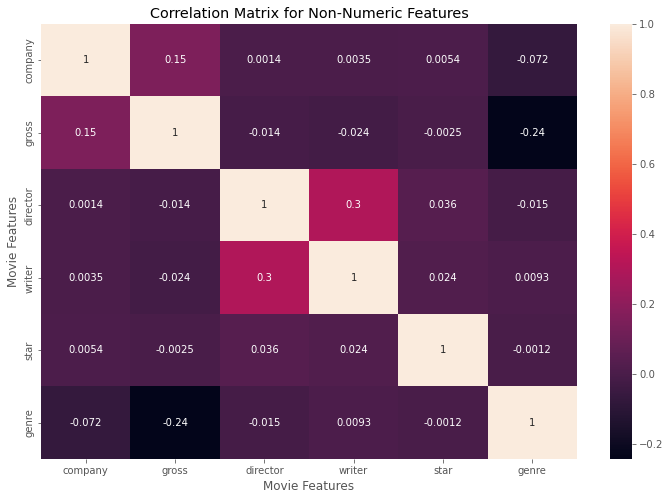

In [226]:
sns.heatmap(Non_numerci_matrix, annot=True)

plt.title('Correlation Matrix for Non-Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

In [227]:
# Only the Director has slightly effect on Gross and it cann't be counted



# Conclusion

## Votes and Budgets have the heights correlation to Gross earnings

## Company has low Correlation, Refuse Hypothesis